In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,CA$48K-CA$80K (Glassdoor est.),Détails du poste\r\nData Scientist\r\nDate 202...,-1.0,Services Conseils IntelliSoft,Montreal,-1,Unknown,-1,Company - Private,...,80,64.0,Services Conseils IntelliSoft,0,-1,1,0,1,0,1
1,Data Scientist,CA$75K-CA$98K (Glassdoor est.),Replicon is looking to hire someone for our Ti...,4.4,Replicon\r\n4.4,Calgary,-1,201 to 500 Employees,1996,Company - Private,...,98,86.5,Replicon\r\n,0,24,1,0,0,0,0
2,Sr. Data Scientist - Application,CA$92K-CA$142K (Glassdoor est.),About Fusion Analytics\r\n\r\n\r\nWe believe i...,4.5,Fusion Analytics\r\n4.5,Toronto,-1,1 to 50 Employees,2006,Company - Private,...,142,117.0,Fusion Analytics\r\n,0,14,1,0,0,0,1
3,Data Scientist / Engineer,CA$62K-CA$94K (Glassdoor est.),Mobile data connectivity drives economic growt...,4.0,"LotusFlare, Inc.\r\n4.0",Waterloo,-1,51 to 200 Employees,2014,Company - Private,...,94,78.0,"LotusFlare, Inc.\r\n",0,6,1,0,0,0,0
4,Data Analyst,CA$49K-CA$66K (Glassdoor est.),MC03 Data Analyst\r\nFull Time Posting Date: 0...,4.0,Maxima Consulting\r\n4.0,Toronto,-1,51 to 200 Employees,-1,Company - Private,...,66,57.5,Maxima Consulting\r\n,0,-1,0,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'






 

#remove new line from job title

In [6]:
# Job title and seniority 
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

analyst           332
data engineer     327
mle               326
na                 10
data scientist      5
Name: job_simp, dtype: int64

In [7]:
# Job title and seniority 
df ['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

senior    652
na        348
Name: seniority, dtype: int64

In [8]:
#  Fix state Los Angeles  
# df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
# df.job_state.value_counts()
#df.drop('job state', implace = True, axis=1)

In [9]:
# Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2793
1      2822
2      2881
3      3120
4      1508
       ... 
995    2042
996    3379
997    2717
998    2042
999    3379
Name: desc_len, Length: 1000, dtype: int64

In [10]:
#  Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [11]:
# hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))

In [14]:
df['company_txt']

0      Services Conseils IntelliSoft
1                         Replicon\n
2                 Fusion Analytics\n
3                 LotusFlare, Inc.\n
4                Maxima Consulting\n
                   ...              
995          CoreHR Solutions Inc.\n
996                          Amgen\n
997                          Aviva\n
998          CoreHR Solutions Inc.\n
999                          Amgen\n
Name: company_txt, Length: 1000, dtype: object

In [15]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len
count,1000.000000,1000.0,1000.00000,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.593600,-1.0,1280.17800,-1.0,0.0,0.0,68.583000,118.023000,93.303000,0.0,64.474000,0.340000,0.0,0.331000,0.004000,0.011000,2735.911000
std,0.327668,0.0,909.06923,0.0,0.0,0.0,3.773506,6.830163,5.169857,0.0,67.540766,0.473946,0.0,0.470809,0.063151,0.104355,646.515809
min,-1.000000,-1.0,-1.00000,-1.0,0.0,0.0,22.000000,47.000000,34.500000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,911.000000
25%,3.400000,-1.0,-1.00000,-1.0,0.0,0.0,69.000000,119.000000,94.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2042.000000
50%,3.600000,-1.0,1861.00000,-1.0,0.0,0.0,69.000000,119.000000,94.000000,0.0,40.000000,0.000000,0.0,0.000000,0.000000,0.000000,2717.000000
75%,3.800000,-1.0,1980.00000,-1.0,0.0,0.0,69.000000,119.000000,94.000000,0.0,159.000000,1.000000,0.0,1.000000,0.000000,0.000000,3379.000000
max,5.000000,-1.0,2017.00000,-1.0,0.0,0.0,92.000000,142.000000,117.000000,0.0,159.000000,1.000000,0.0,1.000000,1.000000,1.000000,10769.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

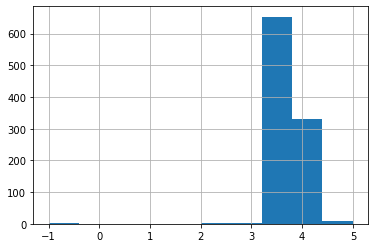

In [17]:
df.Rating.hist()

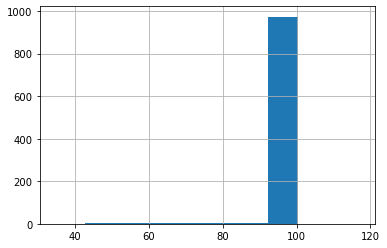

In [18]:
df.avg_salary.hist()

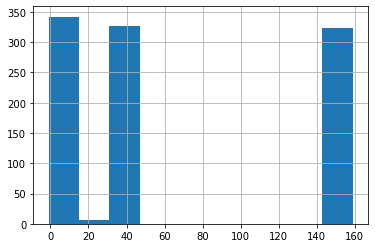

In [19]:
df.age.hist()

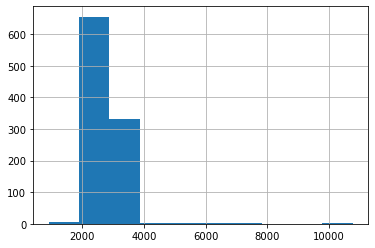

In [20]:
df.desc_len.hist()

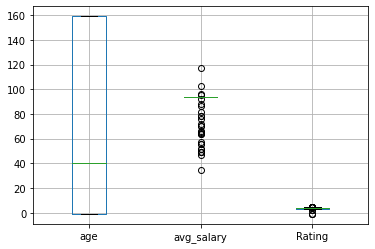

In [21]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

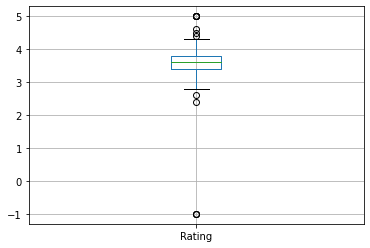

In [22]:
df.boxplot(column = ['Rating'])

In [23]:
df[['age', 'avg_salary', 'desc_len' ,'Rating']].corr()

,age,avg_salary,desc_len,Rating
age,1.000000,0.081020,0.181908,0.146495
avg_salary,0.081020,1.000000,-0.106040,0.161637
desc_len,0.181908,-0.106040,1.000000,0.486097
Rating,0.146495,0.161637,0.486097,1.000000


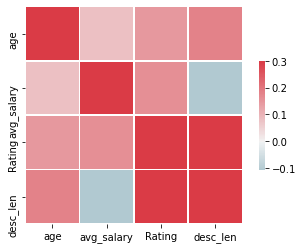

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Headquarters', 'Size','Industry', 'Sector', 'Revenue','company_txt','same_state', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 13


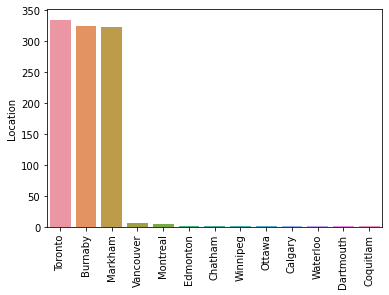

graph for Headquarters: total = 1


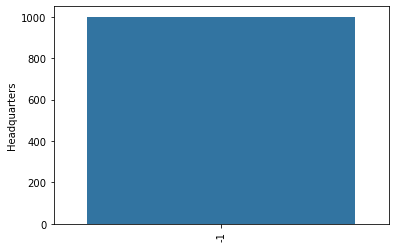

graph for Size: total = 8


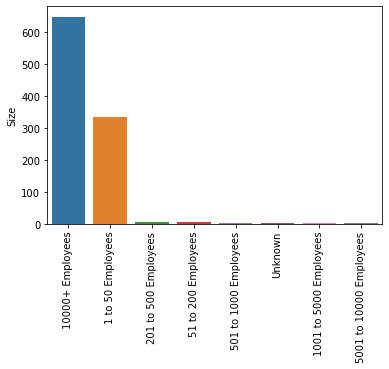

graph for Industry: total = 17


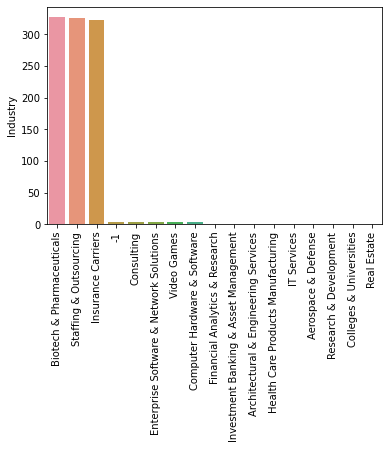

graph for Sector: total = 11


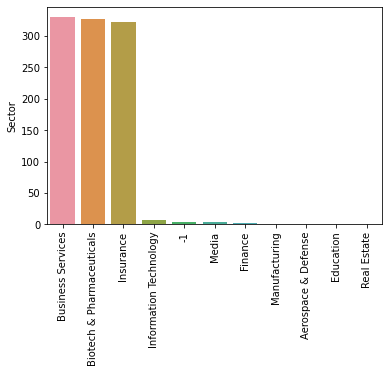

graph for Revenue: total = 11


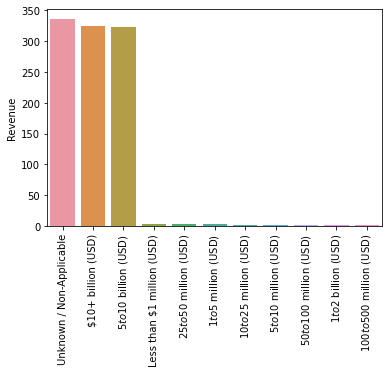

graph for company_txt: total = 31


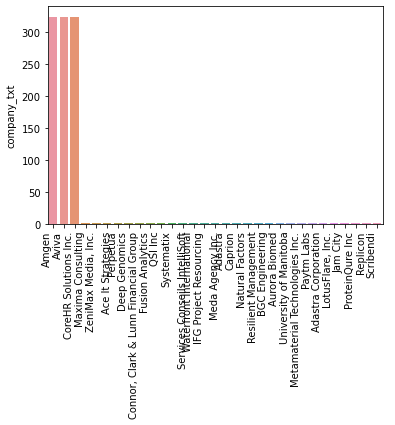

graph for same_state: total = 1


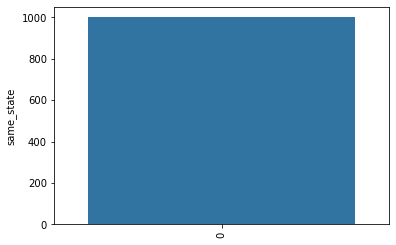

graph for python_yn: total = 2


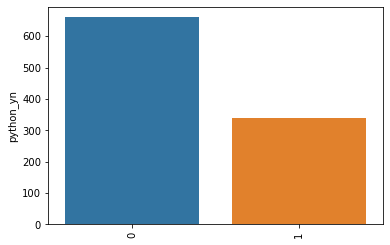

graph for r_yn: total = 1


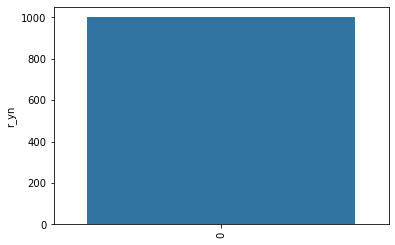

graph for spark_yn: total = 2


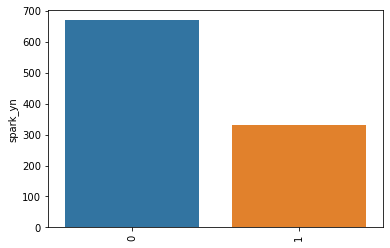

graph for aws_yn: total = 2


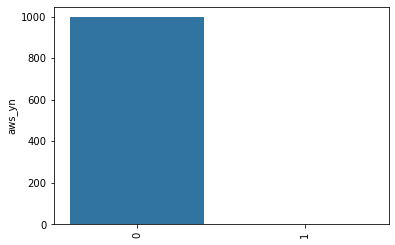

graph for excel_yn: total = 2


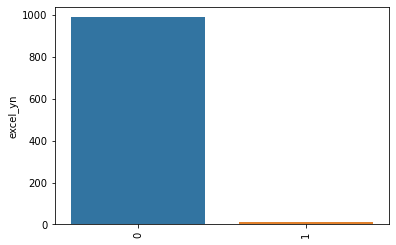

graph for job_simp: total = 5


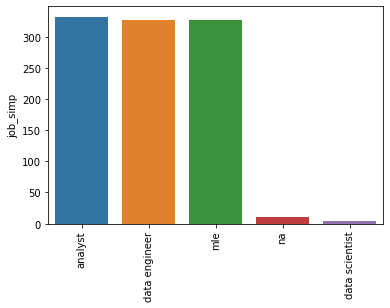

graph for seniority: total = 2


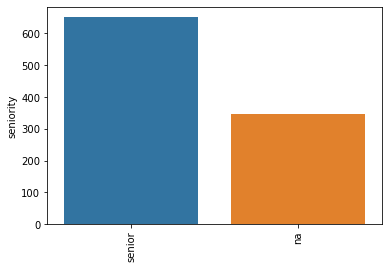

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 13


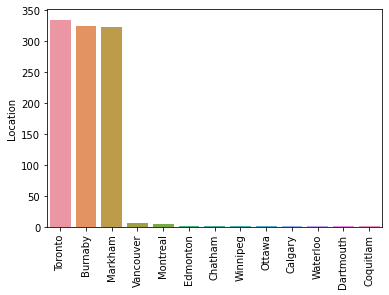

graph for Headquarters: total = 1


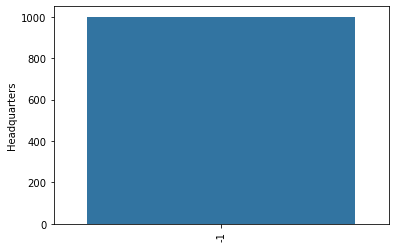

graph for company_txt: total = 20


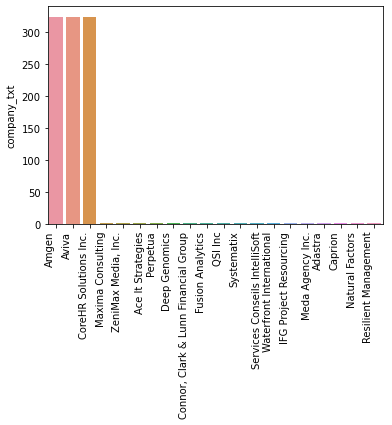

In [28]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,93.126506
data engineer,93.889908
data scientist,86.700000
mle,93.854294
na,65.300000


In [31]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          59.312500
               senior      93.961420
data engineer  na          93.938650
               senior      78.000000
data scientist na          76.166667
               senior     102.500000
mle            na          70.250000
               senior      94.000000
na             na          65.277778
               senior      65.500000

In [32]:
pd.pivot_table(df, index = ['Location', 'seniority'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
Location  seniority            
Dartmouth na         102.500000
Burnaby   senior      94.000000
Markham   senior      94.000000
Toronto   na          93.375000
          senior      92.166667
Vancouver senior      88.000000
Calgary   na          86.500000
Waterloo  na          78.000000
Vancouver na          74.900000
Montreal  senior      65.500000
Edmonton  na          64.500000
Ottawa    na          56.000000
Montreal  na          54.000000
Coquitlam na          49.500000
Chatham   na          46.500000
Winnipeg  na          34.500000

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['Location', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Location', ascending = False)

avg_salary
Location  job_simp                  
Winnipeg  na                       1
Waterloo  data scientist           1
Vancouver na                       2
          data scientist           1
          data engineer            1
          analyst                  2
Toronto   data engineer          326
          na                       3
          mle                      1
          data scientist           1
          analyst                  4
Ottawa    analyst                  1
Montreal  na                       2
          data scientist           1
          analyst                  1
Markham   analyst                323
Edmonton  analyst                  1
Dartmouth na                       1
Coquitlam na                       1
Chatham   mle                      1
Calgary   data scientist           1
Burnaby   mle                    324

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['Location', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
Location,job_simp,
Toronto,data scientist,117.0
Vancouver,data scientist,88.0
Calgary,data scientist,86.5
Waterloo,data scientist,78.0
Montreal,data scientist,64.0


In [36]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [37]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue',  'hourly', 'employer_provided', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'same_state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.5    117.000000
 4.6    102.500000
 3.7     96.000000
 3.4     94.000000
 3.6     93.925926
 3.8     93.909231
 2.8     88.000000
 4.4     86.500000
 5.0     74.100000
 2.6     70.500000
-1.0     70.333333
 3.3     69.000000
 4.3     64.000000
 4.0     61.500000
 2.9     59.000000
 2.4     52.000000
 3.5     49.000000
Industry
                                         avg_salary
Industry                                           
Aerospace & Defense                      102.500000
Insurance Carriers                        94.000000
Biotech & Pharmaceuticals                 93.844037
Staffing & Outsourcing                    93.796923
Architectural & Engineering Services      92.000000
Real Estate                               88.000000
Enterprise Software & Network Solutions   86.833333
Consulting                                79.166667
-1                                        76.000000
Financial Analytics & Research            76.000000

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index ='Revenue', columns = 'python_yn', values = 'avg_salary' , aggfunc = 'count')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
df.to_csv('eda_data.csv')